In [1]:
import numpy as np
from keras.preprocessing import image
from keras.applications import resnet50

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load Keras' ResNet50 model that was pre-trained against the ImageNet database
model = resnet50.ResNet50()

102858752/102853048 [==============================] - 72s 1us/step


In [26]:
# Load the image file, resizing it to 224x224 pixels (required by this model)
img = image.load_img("/Users/tusharnema/Desktop/dog.jpg", target_size=(224, 224))

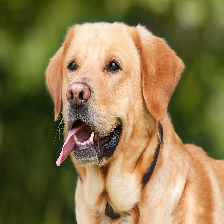

In [27]:
img

In [28]:
# Convert the image to a numpy array
x = image.img_to_array(img)


In [29]:
x

array([[[ 56.,  59.,   6.],
        [ 58.,  61.,   8.],
        [ 58.,  61.,   8.],
        ...,
        [138., 148.,  77.],
        [138., 148.,  77.],
        [138., 148.,  77.]],

       [[ 53.,  57.,   6.],
        [ 54.,  58.,   7.],
        [ 56.,  58.,   8.],
        ...,
        [138., 148.,  77.],
        [138., 148.,  77.],
        [138., 148.,  77.]],

       [[ 49.,  56.,   5.],
        [ 50.,  57.,   6.],
        [ 52.,  56.,   6.],
        ...,
        [140., 150.,  79.],
        [140., 150.,  79.],
        [138., 148.,  77.]],

       ...,

       [[ 57.,  60.,  15.],
        [ 53.,  59.,  13.],
        [ 49.,  56.,  12.],
        ...,
        [233., 207., 182.],
        [231., 205., 180.],
        [227., 194., 163.]],

       [[ 58.,  61.,  14.],
        [ 54.,  60.,  14.],
        [ 52.,  58.,  14.],
        ...,
        [231., 204., 177.],
        [234., 204., 176.],
        [233., 199., 171.]],

       [[ 59.,  62.,  15.],
        [ 57.,  60.,  15.],
        [ 53.,  

In [30]:
x.shape

(224, 224, 3)

In [31]:
# Add a forth dimension since Keras expects a list of images
x = np.expand_dims(x, axis=0)

In [32]:
x.shape

(1, 224, 224, 3)

In [33]:
# Run the image through the deep neural network to make a prediction
predictions = model.predict(x)

In [34]:
# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = resnet50.decode_predictions(predictions, top=9)

In [35]:
print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))

This is an image of:
 - kuvasz: 0.170885 likelihood
 - Labrador_retriever: 0.152197 likelihood
 - Irish_wolfhound: 0.145462 likelihood
 - soft-coated_wheaten_terrier: 0.115127 likelihood
 - Old_English_sheepdog: 0.088157 likelihood
 - clumber: 0.071937 likelihood
 - Great_Pyrenees: 0.052539 likelihood
 - golden_retriever: 0.019005 likelihood
 - Sealyham_terrier: 0.018692 likelihood
